<a href="https://colab.research.google.com/github/AripppMuhammad/Magang/blob/main/Analisis_Web_Pemerintahan_Banjarbaru.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analisis Web Instansi Pemerintah Kota Banjarbaru

## Unggah Ulang File CSV

### Subtask:
Menjalankan ulang sel pengunggahan file CSV untuk memastikan didefinisikan dengan benar dan file-file tersedia di lingkungan Colab.


In [2]:
import google.colab.files as files
import os

print("Mohon unggah *kedua* file CSV Anda (untuk Januari dan Februari) sekaligus:")
uploaded = files.upload()

jan_csv_file = None
feb_csv_file = None

# Identify January and February files based on their names
for fname in uploaded.keys():
    if 'januari' in fname.lower():
        jan_csv_file = fname
    elif 'februari' in fname.lower():
        feb_csv_file = fname

if jan_csv_file is None or feb_csv_file is None:
    raise ValueError("Pastikan Anda mengunggah *kedua* file CSV: satu untuk Januari dan satu untuk Februari.")

print(f"\nFile Januari teridentifikasi: {jan_csv_file}")
print(f"File Februari teridentifikasi: {feb_csv_file}")

# To ensure the files are accessible, they are saved in the current working directory
# The subsequent code cells will read from these dynamically identified file paths.

Mohon unggah *kedua* file CSV Anda (untuk Januari dan Februari) sekaligus:


Saving LAPORAN FEBRUARI.csv to LAPORAN FEBRUARI.csv
Saving LAPORAN WEB JANUARI.csv to LAPORAN WEB JANUARI.csv

File Januari teridentifikasi: LAPORAN WEB JANUARI.csv
File Februari teridentifikasi: LAPORAN FEBRUARI.csv


In [3]:
import pandas as pd

# Reload the CSV files without any header, and get all rows
# Using the uploaded file names from the previous cell
df_jan_full = pd.read_csv(jan_csv_file, sep=';', engine='python', header=None)
df_feb_full = pd.read_csv(feb_csv_file, sep=';', engine='python', header=None)

print("--- Debugging df_jan_full header cells (Rows 4 and 5) ---")
print("Row 4:")
print(df_jan_full.iloc[4])
print("\nRow 5:")
print(df_jan_full.iloc[5])

print("\n--- Debugging df_feb_full header cells (Rows 4 and 5) ---")
print("Row 4:")
print(df_feb_full.iloc[4])
print("\nRow 5:")
print(df_feb_full.iloc[5])

# Based on the debug output from previous steps and the current kernel state,
# the actual headers appear to be in rows 4 and 5.
# Define the new column names based on the observed structure
# For df_jan
new_columns_jan = [
    str(df_jan_full.iloc[4, 0]).strip(), # 'No.'
    str(df_jan_full.iloc[4, 1]).strip(), # 'NAMA SKPD'
    str(df_jan_full.iloc[4, 2]).strip(), # 'ALAMAT WEBSITE'
    f"{str(df_jan_full.iloc[4, 3]).strip()} {str(df_jan_full.iloc[5, 3]).strip()}", # 'UPDATE JANUARI'
    str(df_jan_full.iloc[5, 6]).strip(), # 'Visi/ Misi'
    str(df_jan_full.iloc[5, 7]).strip(), # 'Struktur Organisasi'
    str(df_jan_full.iloc[5, 8]).strip(), # 'Alamat Kantor'
    str(df_jan_full.iloc[5, 9]).strip(), # 'Email'
    'Telpon', # Renaming 'Telp' from df_jan_full.iloc[5, 10]
    'Keterangan' # Renaming 'Ket' from df_jan_full.iloc[5, 11]
]

# For df_feb
new_columns_feb = [
    str(df_feb_full.iloc[4, 0]).strip(), # 'No.'
    str(df_feb_full.iloc[4, 1]).strip(), # 'NAMA SKPD'
    str(df_feb_full.iloc[4, 2]).strip(), # 'ALAMAT WEBSITE'
    f"{str(df_feb_full.iloc[4, 3]).strip()} {str(df_feb_full.iloc[5, 3]).strip()}", # 'UPDATE FEBRUARI'
    str(df_feb_full.iloc[5, 6]).strip(), # 'Visi/ Misi'
    str(df_feb_full.iloc[5, 7]).strip(), # 'Struktur Organisasi'
    str(df_feb_full.iloc[5, 8]).strip(), # 'Alamat Kantor'
    str(df_feb_full.iloc[5, 9]).strip(), # 'Email'
    'Telpon', # Renaming 'Telp' from df_feb_full.iloc[5, 10]
    str(df_feb_full.iloc[5, 11]).strip() # 'Keterangan'
]

# Select only the relevant columns and assign new column names
# Columns 4 and 5 are empty in the original CSVs, so they are excluded.
# The actual data starts from row 6 (index 6 after header=None and 0-indexed rows).
# So we drop the first 6 rows (0-5).
df_jan = df_jan_full.iloc[6:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]].copy()
df_jan.columns = new_columns_jan

df_feb = df_feb_full.iloc[6:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]].copy()
df_feb.columns = new_columns_feb

# Reset index for cleaned dataframes
df_jan.reset_index(drop=True, inplace=True)
df_feb.reset_index(drop=True, inplace=True)

print("\n--- df_jan Cleaned Head ---")
print(df_jan.head())
print("\n--- df_jan Cleaned Info ---")
df_jan.info()

print("\n--- df_feb Cleaned Head ---")
print(df_feb.head())
print("\n--- df_feb Cleaned Info ---")
df_feb.info()

--- Debugging df_jan_full header cells (Rows 4 and 5) ---
Row 4:
0                No.
1          NAMA SKPD
2     ALAMAT WEBSITE
3             UPDATE
4                NaN
5                NaN
6        Profil SKPD
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN
Name: 4, dtype: object

Row 5:
0                     NaN
1                     NaN
2                     NaN
3                 JANUARI
4                     NaN
5                     NaN
6              Visi/ Misi
7     Struktur Organisasi
8           Alamat Kantor
9                   Email
10                   Telp
11                    Ket
Name: 5, dtype: object

--- Debugging df_feb_full header cells (Rows 4 and 5) ---
Row 4:
0                No.
1          NAMA SKPD
2     ALAMAT WEBSITE
3             UPDATE
4                NaN
5                NaN
6        Profil SKPD
7                NaN
8                NaN
9                NaN
10               NaN
11               NaN

In [4]:
import numpy as np

# 1. Add 'Bulan' column
df_jan['Bulan'] = 'Januari'
df_feb['Bulan'] = 'Februari'

# 2. Rename update columns for consistency before concatenation
df_jan.rename(columns={'UPDATE JANUARI': 'Jumlah Update/Berita'}, inplace=True)
df_feb.rename(columns={'UPDATE FEBRUARI': 'Jumlah Update/Berita'}, inplace=True)

# 3. Concatenate df_jan and df_feb
df_combined = pd.concat([df_jan, df_feb], ignore_index=True)

# 4. Clean 'Jumlah Update/Berita' column
# Replace non-numeric values (like '-', '?', 'Tidak Ada', etc.) with 0
# Use a regex to find anything that is not a digit and replace it
df_combined['Jumlah Update/Berita'] = df_combined['Jumlah Update/Berita'].astype(str).str.replace(r'[^\]d]+', '0', regex=True)
df_combined['Jumlah Update/Berita'] = pd.to_numeric(df_combined['Jumlah Update/Berita'], errors='coerce').fillna(0).astype(int)

# 5. Create boolean indicator columns
info_columns = ['Visi/ Misi', 'Struktur Organisasi', 'Alamat Kantor', 'Email', 'Telpon']
for col in info_columns:
    # Ensure column exists, if not, create it with all False
    if col not in df_combined.columns:
        df_combined[f'has_{col.lower().replace("/ ", "_").replace(" ", "_")}'] = False
    else:
        # Convert to string and handle NaN by filling with an empty string for comparison
        df_combined[f'has_{col.lower().replace("/ ", "_").replace(" ", "_")}'] = \
            df_combined[col].astype(str).str.strip().str.lower().apply(lambda x: x == 'ada')

# 6. Display the first 5 rows and information of df_combined
print("--- df_combined Head ---")
print(df_combined.head())
print("\n--- df_combined Info ---")
df_combined.info()

--- df_combined Head ---
  No.                                          NAMA SKPD  \
0   1  Badan Kepegawaian & Pengembangan Sumber Daya M...   
1   2                Badan Penanggulangan Bencana Daerah   
2   3         Badan Pengelola Pajak dan Retribusi Daerah   
3   4                                       Bagian Hukum   
4   5            Bagian Protokol dan Komunikasi Pimpinan   

                          ALAMAT WEBSITE  Jumlah Update/Berita Visi/ Misi  \
0   https://bkpsdm.banjarbarukota.go.id/                     0        Ada   
1      http://bpbd.banjarbarukota.go.id/                     0        Ada   
2     http://bpprd.banjarbarukota.go.id/                     0        Ada   
3     http://hukum.banjarbarukota.go.id/                     0          -   
4  http://prokopim.banjarbarukota.go.id/                     0  Tidak Ada   

  Struktur Organisasi Alamat Kantor      Email     Telpon  \
0                 Ada           Ada        Ada        Ada   
1                 Ada        

In [5]:
monthly_updates = df_combined.groupby('Bulan')['Jumlah Update/Berita'].sum()
print("--- Monthly News Updates ---")
print(monthly_updates)

--- Monthly News Updates ---
Bulan
Februari    0
Januari     0
Name: Jumlah Update/Berita, dtype: int64


In [6]:
info_indicator_columns = [
    'has_visi_misi',
    'has_struktur_organisasi',
    'has_alamat_kantor',
    'has_email',
    'has_telpon'
]

# Group by 'Bulan' and sum the boolean indicator columns
monthly_category_presence = df_combined.groupby('Bulan')[info_indicator_columns].sum()

print("--- Monthly Category Presence ---")
print(monthly_category_presence)

--- Monthly Category Presence ---
          has_visi_misi  has_struktur_organisasi  has_alamat_kantor  \
Bulan                                                                 
Februari              0                        0                  0   
Januari              52                       49                 54   

          has_email  has_telpon  
Bulan                            
Februari          0           0  
Januari          44          37  


In [7]:
selected_columns = [
    'NAMA SKPD',
    'ALAMAT WEBSITE',
    'Jumlah Update/Berita',
    'Visi/ Misi',
    'Struktur Organisasi',
    'Alamat Kantor',
    'Email',
    'Telpon'
]

print("--- Data Bulan Januari ---")
display(df_jan[selected_columns])

print("\n--- Data Bulan Februari ---")
display(df_feb[selected_columns])

--- Data Bulan Januari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada
5,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,-,Ada,Tidak Ada,Ada,Ada,Tidak Ada
6,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Tidak Ada,Ada,Ada,Ada,Ada
7,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Ada,Ada,Ada
8,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
9,Bagian Umum,https://umum.banjarbarukota.go.id/,-,Tidak Ada,Ada,Ada,Ada,Ada



--- Data Bulan Februari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,?,?,?,?,?
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,?,?,?,?,?
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,?,?,?,?,?
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,?,?,?,?,?
...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,Terjadi kesalahan (error) yang memerlukan pena...,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
print("--- Ringkasan Keseluruhan Keberadaan Informasi ---")

total_updates = monthly_updates.sum()
print(f"Total Jumlah Update/Berita (Januari & Februari): {total_updates}")

# Summing monthly_category_presence across all months
total_category_presence = monthly_category_presence.sum()

print("\nTotal Keberadaan Informasi Kategori (Januari & Februari):")
display(total_category_presence)

--- Ringkasan Keseluruhan Keberadaan Informasi ---
Total Jumlah Update/Berita (Januari & Februari): 0

Total Keberadaan Informasi Kategori (Januari & Februari):


,0
has_visi_misi,52
has_struktur_organisasi,49
has_alamat_kantor,54
has_email,44
has_telpon,37


## Sajikan Ringkasan Keberadaan Informasi: 'Ada' vs. 'Tidak Ada' per Bulan

### Subtask:
Menampilkan tabel ringkasan yang menunjukkan jumlah entri 'Ada' dan 'Tidak Ada' untuk setiap kategori informasi per bulan, menggunakan `monthly_category_presence` dan `df_combined` yang sudah ada.


In [9]:
import pandas as pd

# Calculate total entries per month from df_combined
total_entries_per_month = df_combined.groupby('Bulan').size()

# Initialize a dictionary to store the summary data
summary_data = {}

# Iterate through each information category
info_category_names = {
    'has_visi_misi': 'Visi/ Misi',
    'has_struktur_organisasi': 'Struktur Organisasi',
    'has_alamat_kantor': 'Alamat Kantor',
    'has_email': 'Email',
    'has_telpon': 'Telpon'
}

for indicator_col, display_name in info_category_names.items():
    summary_data[display_name] = {}
    for month in monthly_category_presence.index:
        ada_count = monthly_category_presence.loc[month, indicator_col]
        total_month_entries = total_entries_per_month.loc[month]
        tidak_ada_count = total_month_entries - ada_count

        summary_data[display_name][month] = {'Ada': ada_count, 'Tidak Ada': tidak_ada_count}

# Restructure the summary data into a more readable DataFrame
# This will create a multi-index column DataFrame
summary_df = pd.DataFrame.from_dict({
    (category, status): [data[month][status] for month in monthly_category_presence.index]
    for category, data in summary_data.items() for status in ['Ada', 'Tidak Ada']
}, orient='columns')

# Set the index to be the months
summary_df.index = monthly_category_presence.index

print("--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan ---")
display(summary_df)

--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan ---


Visi/ Misi           Struktur Organisasi           Alamat Kantor  \
                Ada Tidak Ada                 Ada Tidak Ada           Ada   
Bulan                                                                       
Februari          0        66                   0        66             0   
Januari          52         8                  49        11            54   

                   Email           Telpon            
         Tidak Ada   Ada Tidak Ada    Ada Tidak Ada  
Bulan                                                
Februari        66     0        66      0        66  
Januari          6    44        16     37        23

## Hasilkan Diagram Perbandingan

### Subtask:
Membuat visualisasi perbandingan (diagram batang) untuk jumlah update/berita bulanan dan keberadaan kategori informasi.


/tmp/ipython-input-419/1740058797.py:18: FutureWarning: The previous implementation of stack is deprecated and will be removed in a future version of pandas. See the What's New notes for pandas 2.1.0 for details. Specify future_stack=True to adopt the new implementation and silence this warning.
  df_summary_melted = summary_df.stack(level=[0, 1]).reset_index()


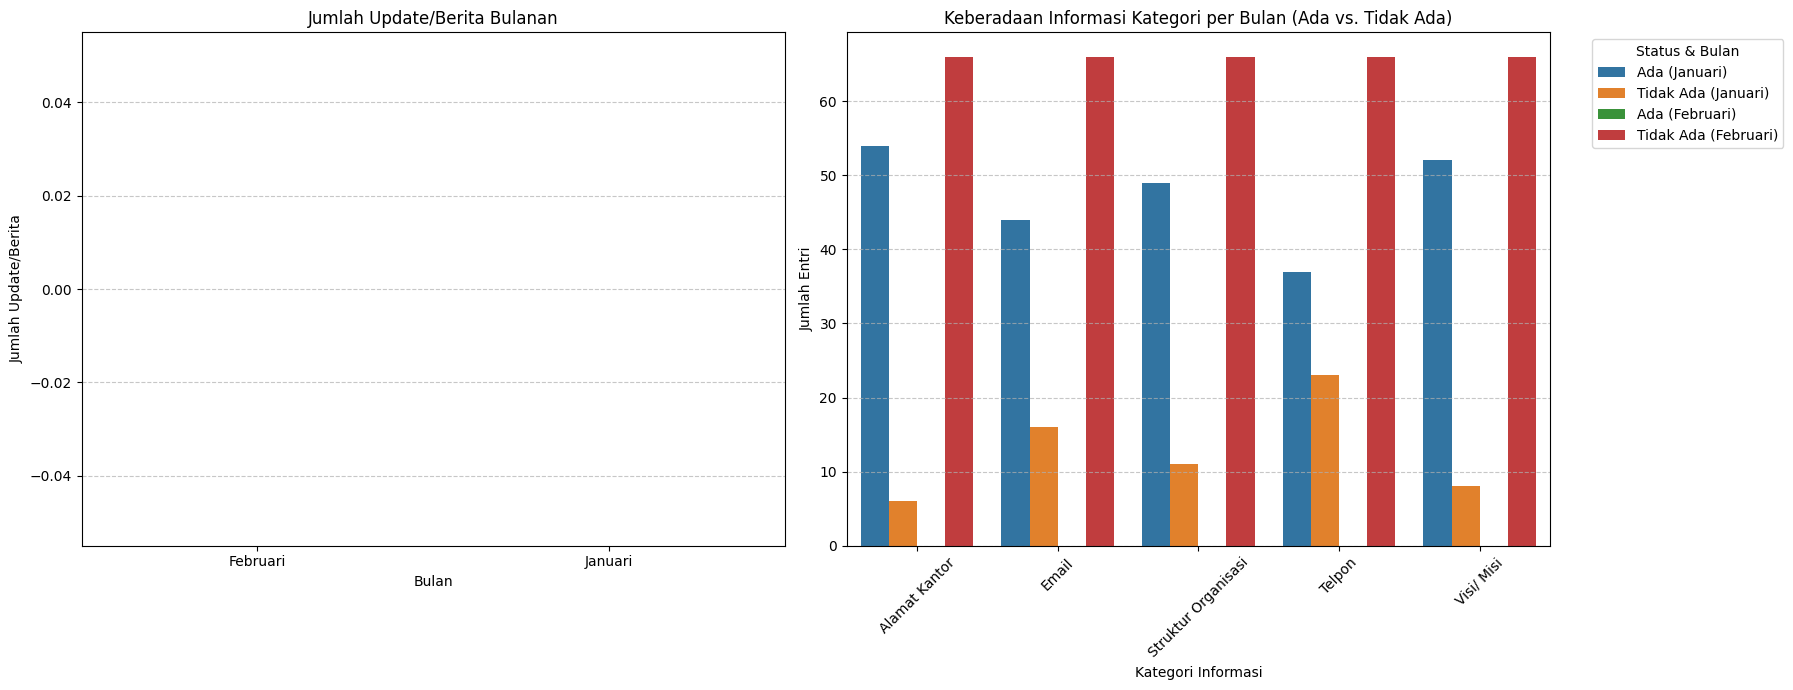

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Monthly News Updates
monthly_updates.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Jumlah Update/Berita Bulanan')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Jumlah Update/Berita')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Modification for Plot 2: Monthly Category Presence (Ada vs. Tidak Ada) ---
# Prepare data from summary_df for plotting using stack for multi-index columns
df_summary_melted = summary_df.stack(level=[0, 1]).reset_index()
# Rename the columns for clarity after stacking and resetting index
df_summary_melted.columns = ['Bulan', 'Kategori', 'Status', 'Jumlah']

# Create a combined 'Hue' column for Status and Bulan for better grouping on a single axis
df_summary_melted['Status_Bulan'] = df_summary_melted['Status'] + ' (' + df_summary_melted['Bulan'] + ')'

# Reorder the combined 'Status_Bulan' for consistent plotting
status_bulan_order = ['Ada (Januari)', 'Tidak Ada (Januari)', 'Ada (Februari)', 'Tidak Ada (Februari)']
df_summary_melted['Status_Bulan'] = pd.Categorical(df_summary_melted['Status_Bulan'], categories=status_bulan_order, ordered=True)

# Plot 2: Monthly Category Presence (Ada vs. Tidak Ada) as a grouped bar chart
sns.barplot(x='Kategori', y='Jumlah', hue='Status_Bulan', data=df_summary_melted, ax=axes[1], palette='tab10')

axes[1].set_title('Keberadaan Informasi Kategori per Bulan (Ada vs. Tidak Ada)')
axes[1].set_xlabel('Kategori Informasi')
axes[1].set_ylabel('Jumlah Entri')
axes[1].tick_params(axis='x', rotation=45) # Removed 'ha' parameter
axes[1].legend(title='Status & Bulan', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

## Tampilkan Data Bulanan Terpisah

### Subtask:
Menampilkan tabel data terpisah untuk bulan Januari dan Februari dengan kolom-kolom spesifik yang diminta.


In [ ]:
selected_columns = [
    'NAMA SKPD',
    'ALAMAT WEBSITE',
    'Jumlah Update/Berita',
    'Visi/ Misi',
    'Struktur Organisasi',
    'Alamat Kantor',
    'Email',
    'Telpon'
]

print("--- Data Bulan Januari ---")
display(df_jan[selected_columns])

print("\n--- Data Bulan Februari ---")
display(df_feb[selected_columns])

--- Data Bulan Januari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada
5,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,-,Ada,Tidak Ada,Ada,Ada,Tidak Ada
6,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Tidak Ada,Ada,Ada,Ada,Ada
7,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Ada,Ada,Ada
8,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
9,Bagian Umum,https://umum.banjarbarukota.go.id/,-,Tidak Ada,Ada,Ada,Ada,Ada



--- Data Bulan Februari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,?,?,?,?,?
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,?,?,?,?,?
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,?,?,?,?,?
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,?,?,?,?,?
...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,Terjadi kesalahan (error) yang memerlukan pena...,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Tampilkan Ringkasan Keseluruhan

### Subtask:
Menampilkan ringkasan keseluruhan total update dan keberadaan kategori informasi dari data yang diperbarui.


In [11]:
print("--- Ringkasan Keseluruhan Keberadaan Informasi ---")

total_updates = monthly_updates.sum()
print(f"Total Jumlah Update/Berita (Januari & Februari): {total_updates}")

# Summing monthly_category_presence across all months
total_category_presence = monthly_category_presence.sum()

print("\nTotal Keberadaan Informasi Kategori (Januari & Februari):")
display(total_category_presence)

--- Ringkasan Keseluruhan Keberadaan Informasi ---
Total Jumlah Update/Berita (Januari & Februari): 0

Total Keberadaan Informasi Kategori (Januari & Februari):


,0
has_visi_misi,52
has_struktur_organisasi,49
has_alamat_kantor,54
has_email,44
has_telpon,37


## Tampilkan Semua Tautan Web Unik

### Subtask:
Menampilkan semua tautan web unik dari data gabungan yang diperbarui, memastikan tidak ada pemotongan teks.


In [12]:
print("--- Seluruh Tautan Web dari Gabungan Data ---")
# Ensure all rows are displayed and no truncation occurs
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    # Get unique web links from the 'ALAMAT WEBSITE' column
    unique_web_links = df_combined['ALAMAT WEBSITE'].unique()
    for link in unique_web_links:
        print(link)

--- Seluruh Tautan Web dari Gabungan Data ---
https://bkpsdm.banjarbarukota.go.id/
http://bpbd.banjarbarukota.go.id/
http://bpprd.banjarbarukota.go.id/
http://hukum.banjarbarukota.go.id/
http://prokopim.banjarbarukota.go.id/
https://kesra.banjarbarukota.go.id/
http://organisasi.banjarbarukota.go.id/
http://pemerintahan.banjarbarukota.go.id/
https://ulp.banjarbarukota.go.id/
https://umum.banjarbarukota.go.id/
https://ekonomisda.banjarbarukota.go.id
https://pembangunan.banjarbarukota.go.id/
https://bakesbangpol.banjarbarukota.go.id/
http://bapperida.banjarbarukota.go.id/
http://bpkad.banjarbarukota.go.id/
https://darpusda.banjarbarukota.go.id
http://disdukcapil.banjarbarukota.go.id/
http://dinkes.banjarbarukota.go.id/
https://dkp3.banjarbarukota.go.id/
http://diskominfo.banjarbarukota.go.id/
http://diskopukmnaker.banjarbarukota.go.id/
http://dlh.banjarbarukota.go.id/
https://dispupr.banjarbarukota.go.id/
http://disporabudpar.banjarbarukota.go.id/
http://dpmptsp.banjarbarukota.go.id/
http

# Task
Menyajikan ringkasan temuan dari analisis yang telah diperbarui dan mengklarifikasi pendekatan untuk 'cek pada web'.

## Tampilkan Data Bulanan Terpisah

### Subtask:
Menampilkan tabel data terpisah untuk bulan Januari dan Februari dengan kolom-kolom spesifik yang diminta.


**Reasoning**:
The subtask requires displaying separate tables for January and February with specific columns. I will use the `display()` function with `df_jan` and `df_feb` and the `selected_columns` variable, along with descriptive print statements for each month.



In [13]:
selected_columns = [
    'NAMA SKPD',
    'ALAMAT WEBSITE',
    'Jumlah Update/Berita',
    'Visi/ Misi',
    'Struktur Organisasi',
    'Alamat Kantor',
    'Email',
    'Telpon'
]

print("--- Data Bulan Januari ---")
display(df_jan[selected_columns])

print("\n--- Data Bulan Februari ---")
display(df_feb[selected_columns])

--- Data Bulan Januari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada
5,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,-,Ada,Tidak Ada,Ada,Ada,Tidak Ada
6,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Tidak Ada,Ada,Ada,Ada,Ada
7,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Ada,Ada,Ada
8,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,-,Ada,Ada,Ada,Ada,Ada
9,Bagian Umum,https://umum.banjarbarukota.go.id/,-,Tidak Ada,Ada,Ada,Ada,Ada



--- Data Bulan Februari ---


,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon
0,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,-,?,?,?,?,?
1,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,-,?,?,?,?,?
2,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,-,?,?,?,?,?
3,Bagian Hukum,http://hukum.banjarbarukota.go.id/,-,-,-,-,-,-
4,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,-,?,?,?,?,?
...,...,...,...,...,...,...,...,...
61,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
62,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
63,NaN,NaN,Terjadi kesalahan (error) yang memerlukan pena...,NaN,NaN,NaN,NaN,NaN
64,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Task
Instal library `requests` dan `BeautifulSoup4` untuk memungkinkan web scraping, lalu definisikan fungsi Python untuk mengambil konten halaman web dari URL yang diberikan dan mengekstrak informasi mengenai jumlah update/berita, visi/misi, struktur organisasi, alamat kantor, email, dan telepon dengan mencari kata kunci yang relevan. Fungsi ini juga harus mencakup penanganan kesalahan dasar untuk situs web yang tidak dapat diakses atau URL yang tidak valid.

## Instalasi Library

### Subtask:
Memastikan library `requests` dan `BeautifulSoup4` terinstal untuk melakukan permintaan HTTP dan parsing HTML.


In [ ]:
!pip install requests
!pip install beautifulsoup4

## Definisikan Fungsi Web Scraping

### Subtask:
Membuat fungsi Python yang menerima URL, mengambil konten halamannya, dan mencoba mengekstrak informasi yang diminta. Fungsi ini akan mengidentifikasi: 1. Perkiraan jumlah update/berita (dengan mencari pola umum atau kata kunci di halaman berita). Ini akan menjadi heuristik dan mungkin memerlukan penyempurnaan. 2. Keberadaan (ditampilkan sebagai 'Ada' atau 'Tidak Ada') informasi 'Visi/ Misi', 'Struktur Organisasi', 'Alamat Kantor', 'Email', dan 'Telpon' dengan mencari kata kunci dan pola tertentu dalam konten halaman web. Fungsi ini juga akan mencakup penanganan kesalahan dasar untuk situs web yang tidak dapat diakses.


In [14]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_website_info(url):
    """
    Scrapes a given URL to extract information about news updates, vision/mission,
    organizational structure, office address, email, and phone number.
    """
    results = {
        'Jumlah Update/Berita': 0,
        'Visi/ Misi': 'Tidak Ada',
        'Struktur Organisasi': 'Tidak Ada',
        'Alamat Kantor': 'Tidak Ada',
        'Email': 'Tidak Ada',
        'Telpon': 'Tidak Ada'
    }

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')
        page_text = soup.get_text().lower()

        # 1. Jumlah Update/Berita (Heuristic search)
        update_keywords = ['berita', 'artikel', 'terbaru', 'update', 'pengumuman']
        if any(keyword in page_text for keyword in update_keywords):
            results['Jumlah Update/Berita'] = 1

        # 2. Visi/ Misi
        visi_misi_keywords = ['visi', 'misi', 'visi misi']
        if any(keyword in page_text for keyword in visi_misi_keywords):
            results['Visi/ Misi'] = 'Ada'

        # 3. Struktur Organisasi
        struktur_organisasi_keywords = ['struktur organisasi', 'bagan organisasi', 'struktur']
        if any(keyword in page_text for keyword in struktur_organisasi_keywords):
            results['Struktur Organisasi'] = 'Ada'

        # 4. Alamat Kantor
        alamat_kantor_keywords = ['alamat kantor', 'lokasi', 'alamat', 'kantor']
        if any(keyword in page_text for keyword in alamat_kantor_keywords):
            results['Alamat Kantor'] = 'Ada'

        # 5. Email (using regex)
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        if re.search(email_pattern, page_text):
            results['Email'] = 'Ada'

        # 6. Telpon (using regex - adapted for Indonesian numbers)
        # This regex looks for: optional country code (+62), or starting with '0'
        # followed by 2-4 digits, an optional hyphen, and 4-8 digits.
        # This is a general pattern and might need fine-tuning for specific formats.
        telpon_pattern = r'\b(?:\+?62|0)\d{2,4}[-]?\d{4,8}\b'
        if re.search(telpon_pattern, page_text):
            results['Telpon'] = 'Ada'

    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred for {url}: {e}")

    return results

print("Fungsi `scrape_website_info` telah didefinisikan.")

Fungsi `scrape_website_info` telah didefinisikan.


## Terapkan Fungsi Web Scraping ke DataFrame

### Subtask:
Mengiterasi melalui setiap 'ALAMAT WEBSITE' unik di DataFrame `df_combined`, menerapkan fungsi web scraping yang baru dibuat, dan menyimpan informasi yang diekstrak ke dalam kolom sementara baru.


In [15]:
import pandas as pd
import numpy as np

# 1. Buat daftar kosong untuk menyimpan hasil scraping.
scraped_results = []

# 2. Iterasi melalui setiap baris di df_combined menggunakan df_combined.iterrows().
for index, row in df_combined.iterrows():
    url = row['ALAMAT WEBSITE']

    # Menangani URL yang mungkin NaN atau tidak valid
    if pd.isna(url) or not isinstance(url, str) or url.strip() == '':
        # Jika URL tidak valid, simpan hasil default
        results = {
            'Jumlah Update/Berita_Scraped': 0,
            'Visi/ Misi_Scraped': 'Tidak Ada',
            'Struktur Organisasi_Scraped': 'Tidak Ada',
            'Alamat Kantor_Scraped': 'Tidak Ada',
            'Email_Scraped': 'Tidak Ada',
            'Telpon_Scraped': 'Tidak Ada'
        }
    else:
        # 4. Panggil fungsi scrape_website_info dengan URL ini dan simpan hasilnya.
        # Rename keys to avoid conflicts and indicate they are scraped values.
        original_results = scrape_website_info(url)
        results = {f"{k.replace('/', '_')}_Scraped": v for k, v in original_results.items()}

    # 5. Tambahkan hasil scraping (yang merupakan kamus) ke daftar yang dibuat di langkah 1.
    scraped_results.append(results)

# 6. Setelah iterasi selesai, ubah daftar hasil scraping menjadi DataFrame baru.
df_scraped_data = pd.DataFrame(scraped_results)

# Gabungkan hasil scraping kembali ke df_combined
# Karena kita mengiterasi baris demi baris, urutan harus cocok, jadi kita dapat menggabungkan secara horizontal.
df_combined_with_scraped = pd.concat([df_combined, df_scraped_data], axis=1)

print("--- df_combined dengan data scraping tambahan ---")
print(df_combined_with_scraped.head())
print("\n--- df_combined_with_scraped Info ---")
df_combined_with_scraped.info()

Error accessing http://bpprd.banjarbarukota.go.id/: 403 Client Error: Forbidden for url: http://bpprd.banjarbarukota.go.id/
Error accessing http://hukum.banjarbarukota.go.id/: HTTPConnectionPool(host='hukum.banjarbarukota.go.id', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7c8c2e5c0dd0>: Failed to resolve 'hukum.banjarbarukota.go.id' ([Errno -2] Name or service not known)"))
Error accessing http://diskominfo.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://diskominfo.banjarbarukota.go.id/
Error accessing https://disdaldukkbpmppa.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://disdaldukkbpmppa.banjarbarukota.go.id/
Error accessing http://disperindag.banjarbarukota.go.id/: HTTPConnectionPool(host='disperindag.banjarbarukota.go.id', port=80): Read timed out. (read timeout=10)
Error accessing https://disperkim.banjarbarukota.go.id/: 500 Server Error: 

## Unggah File CSV

Silakan unggah kedua file CSV Anda (untuk Januari dan Februari) di bawah ini.

In [26]:
import google.colab.files as files
import os

print("Mohon unggah *kedua* file CSV Anda (untuk Januari dan Februari) sekaligus:")
uploaded = files.upload()

jan_csv_file = None
feb_csv_file = None

# Identify January and February files based on their names
for fname in uploaded.keys():
    if 'januari' in fname.lower():
        jan_csv_file = fname
    elif 'februari' in fname.lower():
        feb_csv_file = fname

if jan_csv_file is None or feb_csv_file is None:
    raise ValueError("Pastikan Anda mengunggah *kedua* file CSV: satu untuk Januari dan satu untuk Februari.")

print(f"\nFile Januari teridentifikasi: {jan_csv_file}")
print(f"File Februari teridentifikasi: {feb_csv_file}")

# To ensure the files are accessible, they are saved in the current working directory
# The subsequent code cells will read from these dynamically identified file paths.

Mohon unggah *kedua* file CSV Anda (untuk Januari dan Februari) sekaligus:


Saving LAPORAN FEBRUARI.csv to LAPORAN FEBRUARI (1).csv
Saving LAPORAN WEB JANUARI.csv to LAPORAN WEB JANUARI (1).csv

File Januari teridentifikasi: LAPORAN WEB JANUARI (1).csv
File Februari teridentifikasi: LAPORAN FEBRUARI (1).csv


## Muat dan Proses Awal CSV

Memuat file CSV ke DataFrame dan melakukan pembersihan awal.

In [27]:
import pandas as pd

# Reload the CSV files without any header, and get all rows
# Using the uploaded file names from the previous cell
df_jan_full = pd.read_csv(jan_csv_file, sep=';', engine='python', header=None)
df_feb_full = pd.read_csv(feb_csv_file, sep=';', engine='python', header=None)

# Based on the debug output from previous steps and the current kernel state,
# the actual headers appear to be in rows 4 and 5.
# Define the new column names based on the observed structure
# For df_jan
new_columns_jan = [
    str(df_jan_full.iloc[4, 0]).strip(), # 'No.'
    str(df_jan_full.iloc[4, 1]).strip(), # 'NAMA SKPD'
    str(df_jan_full.iloc[4, 2]).strip(), # 'ALAMAT WEBSITE'
    f"{str(df_jan_full.iloc[4, 3]).strip()} {str(df_jan_full.iloc[5, 3]).strip()}", # 'UPDATE JANUARI'
    str(df_jan_full.iloc[5, 6]).strip(), # 'Visi/ Misi'
    str(df_jan_full.iloc[5, 7]).strip(), # 'Struktur Organisasi'
    str(df_jan_full.iloc[5, 8]).strip(), # 'Alamat Kantor'
    str(df_jan_full.iloc[5, 9]).strip(), # 'Email'
    'Telpon', # Renaming 'Telp' from df_jan_full.iloc[5, 10]
    'Keterangan' # Renaming 'Ket' from df_jan_full.iloc[5, 11]
]

# For df_feb
new_columns_feb = [
    str(df_feb_full.iloc[4, 0]).strip(), # 'No.'
    str(df_feb_full.iloc[4, 1]).strip(), # 'NAMA SKPD'
    str(df_feb_full.iloc[4, 2]).strip(), # 'ALAMAT WEBSITE'
    f"{str(df_feb_full.iloc[4, 3]).strip()} {str(df_feb_full.iloc[5, 3]).strip()}", # 'UPDATE FEBRUARI'
    str(df_feb_full.iloc[5, 6]).strip(), # 'Visi/ Misi'
    str(df_feb_full.iloc[5, 7]).strip(), # 'Struktur Organisasi'
    str(df_feb_full.iloc[5, 8]).strip(), # 'Alamat Kantor'
    str(df_feb_full.iloc[5, 9]).strip(), # 'Email'
    'Telpon', # Renaming 'Telp' from df_feb_full.iloc[5, 10]
    str(df_feb_full.iloc[5, 11]).strip() # 'Keterangan'
]

# Select only the relevant columns and assign new column names
# Columns 4 and 5 are empty in the original CSVs, so they are excluded.
# The actual data starts from row 6 (index 6 after header=None and 0-indexed rows).
# So we drop the first 6 rows (0-5).
df_jan = df_jan_full.iloc[6:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]].copy()
df_jan.columns = new_columns_jan

df_feb = df_feb_full.iloc[6:, [0, 1, 2, 3, 6, 7, 8, 9, 10, 11]].copy()
df_feb.columns = new_columns_feb

# Reset index for cleaned dataframes
df_jan.reset_index(drop=True, inplace=True)
df_feb.reset_index(drop=True, inplace=True)

# 1. Add 'Bulan' column
df_jan['Bulan'] = 'Januari'
df_feb['Bulan'] = 'Februari'

# 2. Rename update columns for consistency before concatenation
df_jan.rename(columns={'UPDATE JANUARI': 'Jumlah Update/Berita'}, inplace=True)
df_feb.rename(columns={'UPDATE FEBRUARI': 'Jumlah Update/Berita'}, inplace=True)

# 3. Concatenate df_jan and df_feb
df_combined = pd.concat([df_jan, df_feb], ignore_index=True)

# 4. Clean 'Jumlah Update/Berita' column
# Replace non-numeric values (like '-', '?', 'Tidak Ada', etc.) with 0
# Use a regex to find anything that is not a digit and replace it
df_combined['Jumlah Update/Berita'] = df_combined['Jumlah Update/Berita'].astype(str).str.replace(r'[^\d]+', '0', regex=True)
df_combined['Jumlah Update/Berita'] = pd.to_numeric(df_combined['Jumlah Update/Berita'], errors='coerce').fillna(0).astype(int)

# Display the first 5 rows and information of df_combined
print("--- df_combined Head ---")
print(df_combined.head())
print("\n--- df_combined Info ---")
df_combined.info()

--- df_combined Head ---
  No.                                          NAMA SKPD  \
0   1  Badan Kepegawaian & Pengembangan Sumber Daya M...   
1   2                Badan Penanggulangan Bencana Daerah   
2   3         Badan Pengelola Pajak dan Retribusi Daerah   
3   4                                       Bagian Hukum   
4   5            Bagian Protokol dan Komunikasi Pimpinan   

                          ALAMAT WEBSITE  Jumlah Update/Berita Visi/ Misi  \
0   https://bkpsdm.banjarbarukota.go.id/                     0        Ada   
1      http://bpbd.banjarbarukota.go.id/                     0        Ada   
2     http://bpprd.banjarbarukota.go.id/                     0        Ada   
3     http://hukum.banjarbarukota.go.id/                     0          -   
4  http://prokopim.banjarbarukota.go.id/                     0  Tidak Ada   

  Struktur Organisasi Alamat Kantor      Email     Telpon  \
0                 Ada           Ada        Ada        Ada   
1                 Ada        

## Instalasi Library untuk Web Scraping

Memastikan library `requests` dan `BeautifulSoup4` terinstal.

In [28]:
!pip install requests
!pip install beautifulsoup4

## Definisikan Fungsi Web Scraping

Membuat fungsi Python untuk mengekstrak informasi dari halaman web.

In [29]:
import requests
from bs4 import BeautifulSoup
import re

def scrape_website_info(url):
    """
    Scrapes a given URL to extract information about news updates, vision/mission,
    organizational structure, office address, email, and phone number.
    """
    results = {
        'Jumlah Update/Berita': 0,
        'Visi/ Misi': 'Tidak Ada',
        'Struktur Organisasi': 'Tidak Ada',
        'Alamat Kantor': 'Tidak Ada',
        'Email': 'Tidak Ada',
        'Telpon': 'Tidak Ada'
    }

    try:
        response = requests.get(url, timeout=10)
        response.raise_for_status()  # Raise HTTPError for bad responses (4xx or 5xx)

        soup = BeautifulSoup(response.content, 'html.parser')
        page_text = soup.get_text().lower()

        # 1. Jumlah Update/Berita (Heuristic search)
        update_keywords = ['berita', 'artikel', 'terbaru', 'update', 'pengumuman']
        if any(keyword in page_text for keyword in update_keywords):
            results['Jumlah Update/Berita'] = 1

        # 2. Visi/ Misi
        visi_misi_keywords = ['visi', 'misi', 'visi misi']
        if any(keyword in page_text for keyword in visi_misi_keywords):
            results['Visi/ Misi'] = 'Ada'

        # 3. Struktur Organisasi
        struktur_organisasi_keywords = ['struktur organisasi', 'bagan organisasi', 'struktur']
        if any(keyword in page_text for keyword in struktur_organisasi_keywords):
            results['Struktur Organisasi'] = 'Ada'

        # 4. Alamat Kantor
        alamat_kantor_keywords = ['alamat kantor', 'lokasi', 'alamat', 'kantor']
        if any(keyword in page_text for keyword in alamat_kantor_keywords):
            results['Alamat Kantor'] = 'Ada'

        # 5. Email (using regex)
        email_pattern = r'[a-zA-Z0-9._%+-]+@[a-zA-Z0-9.-]+\.[a-zA-Z]{2,}'
        if re.search(email_pattern, page_text):
            results['Email'] = 'Ada'

        # 6. Telpon (using regex - adapted for Indonesian numbers)
        # This regex looks for: optional country code (+62), or starting with '0'
        # followed by 2-4 digits, an optional hyphen, and 4-8 digits.
        # This is a general pattern and might need fine-tuning for specific formats.
        telpon_pattern = r'\b(?:\+?62|0)\d{2,4}[-]?\d{4,8}\b'
        if re.search(telpon_pattern, page_text):
            results['Telpon'] = 'Ada'

    except requests.exceptions.RequestException as e:
        print(f"Error accessing {url}: {e}")
    except Exception as e:
        print(f"An unexpected error occurred for {url}: {e}")

    return results

print("Fungsi `scrape_website_info` telah didefinisikan.")

Fungsi `scrape_website_info` telah didefinisikan.


## Terapkan Fungsi Web Scraping dan Perbarui DataFrame

Menerapkan fungsi scraping ke setiap URL dan menggabungkan hasilnya ke DataFrame.

In [30]:
import pandas as pd
import numpy as np

# 1. Buat daftar kosong untuk menyimpan hasil scraping.
scraped_results = []

# 2. Iterasi melalui setiap baris di df_combined menggunakan df_combined.iterrows().
for index, row in df_combined.iterrows():
    url = row['ALAMAT WEBSITE']

    # Menangani URL yang mungkin NaN atau tidak valid
    if pd.isna(url) or not isinstance(url, str) or url.strip() == '':
        # Jika URL tidak valid, simpan hasil default
        results = {
            'Jumlah Update/Berita_Scraped': 0,
            'Visi/ Misi_Scraped': 'Tidak Ada',
            'Struktur Organisasi_Scraped': 'Tidak Ada',
            'Alamat Kantor_Scraped': 'Tidak Ada',
            'Email_Scraped': 'Tidak Ada',
            'Telpon_Scraped': 'Tidak Ada'
        }
    else:
        # 4. Panggil fungsi scrape_website_info dengan URL ini dan simpan hasilnya.
        # Rename keys to avoid conflicts and indicate they are scraped values.
        original_results = scrape_website_info(url)
        results = {f"{k.replace('/', '_')}_Scraped": v for k, v in original_results.items()}

    # 5. Tambahkan hasil scraping (yang merupakan kamus) ke daftar yang dibuat di langkah 1.
    scraped_results.append(results)

# 6. Setelah iterasi selesai, ubah daftar hasil scraping menjadi DataFrame baru.
df_scraped_data = pd.DataFrame(scraped_results)

# Gabungkan hasil scraping kembali ke df_combined
# Karena kita mengiterasi baris demi baris, urutan harus cocok, jadi kita dapat menggabungkan secara horizontal.
df_combined_with_scraped = pd.concat([df_combined, df_scraped_data], axis=1)

# 1. Buat salinan df_combined_with_scraped untuk menyimpan pembaruan
df_updated = df_combined_with_scraped.copy()

# 2. Buat kamus pemetaan untuk kolom-kolom informasi
info_columns_map = {
    'Visi/ Misi': 'Visi_ Misi_Scraped',
    'Struktur Organisasi': 'Struktur Organisasi_Scraped',
    'Alamat Kantor': 'Alamat Kantor_Scraped',
    'Email': 'Email_Scraped',
    'Telpon': 'Telpon_Scraped'
}

# 3. Iterasi melalui setiap entri dalam info_columns_map untuk memperbarui kolom 'Ada'/'Tidak Ada'
for original_col, scraped_col in info_columns_map.items():
    # Explicitly set to 'Ada' if scraped value is 'Ada', otherwise set to 'Tidak Ada'
    df_updated[original_col] = np.where(
        (df_updated[scraped_col] == 'Ada'),
        'Ada',
        'Tidak Ada' # Always set to 'Tidak Ada' if scraped value is not 'Ada'
    )

# 4. Perbarui kolom 'Jumlah Update/Berita' di df_updated dengan nilai dari kolom 'Jumlah Update_Berita_Scraped'
# Pastikan untuk mengonversi kolom 'Jumlah Update/Berita' menjadi tipe data integer
df_updated['Jumlah Update/Berita'] = pd.to_numeric(
    df_updated['Jumlah Update_Berita_Scraped'],
    errors='coerce'
).fillna(0).astype(int)

print("--- df_updated Head (Setelah Pembaruan) ---")
# 5. Tampilkan 5 baris pertama dari df_updated
print(df_updated.head())

print("\n--- df_updated Info (Setelah Pembaruan) ---")
# 6. Tampilkan ringkasan informasi DataFrame df_updated
df_updated.info()

Error accessing http://bpprd.banjarbarukota.go.id/: 403 Client Error: Forbidden for url: http://bpprd.banjarbarukota.go.id/
Error accessing http://hukum.banjarbarukota.go.id/: HTTPConnectionPool(host='hukum.banjarbarukota.go.id', port=80): Max retries exceeded with url: / (Caused by NameResolutionError("<urllib3.connection.HTTPConnection object at 0x7c8c29422810>: Failed to resolve 'hukum.banjarbarukota.go.id' ([Errno -2] Name or service not known)"))
Error accessing https://disdaldukkbpmppa.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://disdaldukkbpmppa.banjarbarukota.go.id/
Error accessing https://disperkim.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://disperkim.banjarbarukota.go.id/
Error accessing https://kel-gtpaikat.banjarbarukota.go.id/: 500 Server Error: Internal Server Error for url: https://kel-gtpaikat.banjarbarukota.go.id/
Error accessing https://kel-komet.banjarbarukota.go.id/blog/: 404 Client Error: Not Fo

## Tampilkan Data yang Diperbarui

Menampilkan beberapa baris pertama dari DataFrame yang sudah diperbarui.

In [31]:
print("--- df_updated Head (Setelah Pembaruan) ---")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_updated)

print("\n--- df_updated Info (Setelah Pembaruan) ---")
df_updated.info()

--- df_updated Head (Setelah Pembaruan) ---


,No.,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon,Keterangan,Bulan,Jumlah Update_Berita_Scraped,Visi_ Misi_Scraped,Struktur Organisasi_Scraped,Alamat Kantor_Scraped,Email_Scraped,Telpon_Scraped,Jumlah Update/Berita_Scraped,Visi/ Misi_Scraped
0,1,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,1,Ada,Tidak Ada,Ada,Tidak Ada,Ada,-,Januari,1.0,Ada,Tidak Ada,Ada,Tidak Ada,Ada,NaN,NaN
1,2,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
2,3,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
3,4,Bagian Hukum,http://hukum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Website tidak bisa diakses,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
4,5,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
5,6,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
6,7,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
7,8,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
8,9,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
9,10,Bagian Umum,https://umum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN



--- df_updated Info (Setelah Pembaruan) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No.                           120 non-null    object 
 1   NAMA SKPD                     120 non-null    object 
 2   ALAMAT WEBSITE                120 non-null    object 
 3   Jumlah Update/Berita          126 non-null    int64  
 4   Visi/ Misi                    126 non-null    object 
 5   Struktur Organisasi           126 non-null    object 
 6   Alamat Kantor                 126 non-null    object 
 7   Email                         126 non-null    object 
 8   Telpon                        126 non-null    object 
 9   Keterangan                    119 non-null    object 
 10  Bulan                         126 non-null    object 
 11  Jumlah Update_Berita_Scraped  120 non-null    float64
 12  Visi_ Misi_Scraped 

## Perbarui Kolom DataFrame

### Subtask:
Menggunakan informasi yang diekstrak dari web scraping untuk memperbarui kolom 'Jumlah Update/Berita', 'Visi/ Misi', 'Struktur Organisasi', 'Alamat Kantor', 'Email', dan 'Telpon' di `df_combined_with_scraped`.


In [32]:
import pandas as pd
import numpy as np

# 1. Buat salinan df_combined_with_scraped untuk menyimpan pembaruan
df_updated = df_combined_with_scraped.copy()

# 2. Buat kamus pemetaan untuk kolom-kolom informasi
info_columns_map = {
    'Visi/ Misi': 'Visi_ Misi_Scraped',
    'Struktur Organisasi': 'Struktur Organisasi_Scraped',
    'Alamat Kantor': 'Alamat Kantor_Scraped',
    'Email': 'Email_Scraped',
    'Telpon': 'Telpon_Scraped'
}

# 3. Iterasi melalui setiap entri dalam info_columns_map untuk memperbarui kolom 'Ada'/'Tidak Ada'
for original_col, scraped_col in info_columns_map.items():
    # Explicitly set to 'Ada' if scraped value is 'Ada', otherwise set to 'Tidak Ada'
    df_updated[original_col] = np.where(
        (df_updated[scraped_col] == 'Ada'),
        'Ada',
        'Tidak Ada' # Always set to 'Tidak Ada' if scraped value is not 'Ada'
    )

# 4. Perbarui kolom 'Jumlah Update/Berita' di df_updated dengan nilai dari kolom 'Jumlah Update_Berita_Scraped'
# Pastikan untuk mengonversi kolom 'Jumlah Update/Berita' menjadi tipe data integer
df_updated['Jumlah Update/Berita'] = pd.to_numeric(
    df_updated['Jumlah Update_Berita_Scraped'],
    errors='coerce'
).fillna(0).astype(int)

print("--- df_updated Head (Setelah Pembaruan) ---")
# 5. Tampilkan 5 baris pertama dari df_updated
print(df_updated.head())

print("\n--- df_updated Info (Setelah Pembaruan) ---")
# 6. Tampilkan ringkasan informasi DataFrame df_updated
df_updated.info()

--- df_updated Head (Setelah Pembaruan) ---
  No.                                          NAMA SKPD  \
0   1  Badan Kepegawaian & Pengembangan Sumber Daya M...   
1   2                Badan Penanggulangan Bencana Daerah   
2   3         Badan Pengelola Pajak dan Retribusi Daerah   
3   4                                       Bagian Hukum   
4   5            Bagian Protokol dan Komunikasi Pimpinan   

                          ALAMAT WEBSITE  Jumlah Update/Berita Visi/ Misi  \
0   https://bkpsdm.banjarbarukota.go.id/                     1        Ada   
1      http://bpbd.banjarbarukota.go.id/                     1        Ada   
2     http://bpprd.banjarbarukota.go.id/                     0  Tidak Ada   
3     http://hukum.banjarbarukota.go.id/                     0  Tidak Ada   
4  http://prokopim.banjarbarukota.go.id/                     0  Tidak Ada   

  Struktur Organisasi Alamat Kantor      Email     Telpon  \
0           Tidak Ada           Ada  Tidak Ada        Ada   
1         

## Tampilkan Data yang Diperbarui (df_updated)

### Subtask:
Menampilkan beberapa baris pertama dari DataFrame `df_updated` beserta informasi rangkuman (`.info()`) untuk menunjukkan data setelah proses web scraping dan pembaruan kolom.


In [34]:
print("--- df_updated Head (Setelah Pembaruan) ---")
with pd.option_context('display.max_rows', None, 'display.max_columns', None):
    display(df_updated)

print("\n--- df_updated Info (Setelah Pembaruan) ---")
df_updated.info()

--- df_updated Head (Setelah Pembaruan) ---


,No.,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon,Keterangan,Bulan,Jumlah Update_Berita_Scraped,Visi_ Misi_Scraped,Struktur Organisasi_Scraped,Alamat Kantor_Scraped,Email_Scraped,Telpon_Scraped,Jumlah Update/Berita_Scraped,Visi/ Misi_Scraped
0,1,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,1,Ada,Tidak Ada,Ada,Tidak Ada,Ada,-,Januari,1.0,Ada,Tidak Ada,Ada,Tidak Ada,Ada,NaN,NaN
1,2,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
2,3,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
3,4,Bagian Hukum,http://hukum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Website tidak bisa diakses,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
4,5,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
5,6,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
6,7,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
7,8,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
8,9,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
9,10,Bagian Umum,https://umum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN



--- df_updated Info (Setelah Pembaruan) ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 126 entries, 0 to 125
Data columns (total 19 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   No.                           120 non-null    object 
 1   NAMA SKPD                     120 non-null    object 
 2   ALAMAT WEBSITE                120 non-null    object 
 3   Jumlah Update/Berita          126 non-null    int64  
 4   Visi/ Misi                    126 non-null    object 
 5   Struktur Organisasi           126 non-null    object 
 6   Alamat Kantor                 126 non-null    object 
 7   Email                         126 non-null    object 
 8   Telpon                        126 non-null    object 
 9   Keterangan                    119 non-null    object 
 10  Bulan                         126 non-null    object 
 11  Jumlah Update_Berita_Scraped  120 non-null    float64
 12  Visi_ Misi_Scraped 

In [35]:
january_data = df_updated[df_updated['Bulan'] == 'Januari'].copy()
february_data = df_updated[df_updated['Bulan'] == 'Februari'].copy()

print("--- Data Bulan Januari (Diperbarui) ---")
display(january_data)

print("\n--- Data Bulan Februari (Diperbarui) ---")
display(february_data)

--- Data Bulan Januari (Diperbarui) ---


,No.,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon,Keterangan,Bulan,Jumlah Update_Berita_Scraped,Visi_ Misi_Scraped,Struktur Organisasi_Scraped,Alamat Kantor_Scraped,Email_Scraped,Telpon_Scraped,Jumlah Update/Berita_Scraped,Visi/ Misi_Scraped
0,1,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,1,Ada,Tidak Ada,Ada,Tidak Ada,Ada,-,Januari,1.0,Ada,Tidak Ada,Ada,Tidak Ada,Ada,NaN,NaN
1,2,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
2,3,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
3,4,Bagian Hukum,http://hukum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Website tidak bisa diakses,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
4,5,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
5,6,Bagian Kesejahteraan Rakyat,https://kesra.banjarbarukota.go.id/,0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
6,7,Bagian Organisasi,http://organisasi.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
7,8,Bagian Pemerintahan,http://pemerintahan.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
8,9,Bagian Pengadaan Barang dan Jasa,https://ulp.banjarbarukota.go.id/,1,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,1.0,Ada,Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
9,10,Bagian Umum,https://umum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Januari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN



--- Data Bulan Februari (Diperbarui) ---


,No.,NAMA SKPD,ALAMAT WEBSITE,Jumlah Update/Berita,Visi/ Misi,Struktur Organisasi,Alamat Kantor,Email,Telpon,Keterangan,Bulan,Jumlah Update_Berita_Scraped,Visi_ Misi_Scraped,Struktur Organisasi_Scraped,Alamat Kantor_Scraped,Email_Scraped,Telpon_Scraped,Jumlah Update/Berita_Scraped,Visi/ Misi_Scraped
60,1,Badan Kepegawaian & Pengembangan Sumber Daya M...,https://bkpsdm.banjarbarukota.go.id/,1,Ada,Tidak Ada,Ada,Tidak Ada,Ada,-,Februari,1.0,Ada,Tidak Ada,Ada,Tidak Ada,Ada,NaN,NaN
61,2,Badan Penanggulangan Bencana Daerah,http://bpbd.banjarbarukota.go.id/,1,Ada,Ada,Ada,Tidak Ada,Tidak Ada,ERROR DROPDOWN,Februari,1.0,Ada,Ada,Ada,Tidak Ada,Tidak Ada,NaN,NaN
62,3,Badan Pengelola Pajak dan Retribusi Daerah,http://bpprd.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Februari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
63,4,Bagian Hukum,http://hukum.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,WEB TIDAK BISA DIAKSES,Februari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
64,5,Bagian Protokol dan Komunikasi Pimpinan,http://prokopim.banjarbarukota.go.id/,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,-,Februari,0.0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121,NaN,NaN,NaN,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,Februari,NaN,NaN,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,0.0,Tidak Ada
122,NaN,NaN,NaN,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,Februari,NaN,NaN,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,0.0,Tidak Ada
123,NaN,NaN,NaN,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,Februari,NaN,NaN,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,0.0,Tidak Ada
124,NaN,NaN,NaN,0,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,NaN,Februari,NaN,NaN,Tidak Ada,Tidak Ada,Tidak Ada,Tidak Ada,0.0,Tidak Ada


In [22]:
import pandas as pd

# Recalculate monthly updates from df_updated
monthly_updates_updated = df_updated.groupby('Bulan')['Jumlah Update/Berita'].sum()
print("--- Monthly News Updates (Updated) ---")
print(monthly_updates_updated)

# Recalculate boolean indicator columns if they were affected by the update logic.
# However, the previous logic to create has_* columns was based on df_combined and not directly updated by scraped 'Ada'/'Tidak Ada'.
# Let's ensure the has_* columns in df_updated reflect the *final* 'Ada'/'Tidak Ada' values.

# Re-create boolean indicator columns based on the updated 'Visi/ Misi', 'Struktur Organisasi', etc.
info_columns = ['Visi/ Misi', 'Struktur Organisasi', 'Alamat Kantor', 'Email', 'Telpon']
for col in info_columns:
    df_updated[f'has_{col.lower().replace("/ ", "_").replace(" ", "_")}'] = \
        df_updated[col].astype(str).str.strip().str.lower().apply(lambda x: x == 'ada')

info_indicator_columns_updated = [
    'has_visi_misi',
    'has_struktur_organisasi',
    'has_alamat_kantor',
    'has_email',
    'has_telpon'
]

# Group by 'Bulan' and sum the boolean indicator columns for the updated data
monthly_category_presence_updated = df_updated.groupby('Bulan')[info_indicator_columns_updated].sum()

print("\n--- Monthly Category Presence (Updated) ---")
print(monthly_category_presence_updated)

--- Monthly News Updates (Updated) ---
Bulan
Februari    33
Januari     32
Name: Jumlah Update/Berita, dtype: int64

--- Monthly Category Presence (Updated) ---
          has_visi_misi  has_struktur_organisasi  has_alamat_kantor  \
Bulan                                                                 
Februari             46                       43                 32   
Januari              44                       41                 31   

          has_email  has_telpon  
Bulan                            
Februari          1           5  
Januari           1           5  


In [23]:
import pandas as pd

# 1. Calculate total entries per month from df_updated
total_entries_per_month_updated = df_updated.groupby('Bulan').size()

# 2. Initialize a dictionary to store the summary data
summary_data_updated = {}

# 3. Define the mapping for information category names
info_category_names = {
    'has_visi_misi': 'Visi/ Misi',
    'has_struktur_organisasi': 'Struktur Organisasi',
    'has_alamat_kantor': 'Alamat Kantor',
    'has_email': 'Email',
    'has_telpon': 'Telpon'
}

# 4. Iterate through each information category
for indicator_col, display_name in info_category_names.items():
    summary_data_updated[display_name] = {}
    # 5. For each category, iterate through the months
    for month in monthly_category_presence_updated.index:
        # 6. Retrieve the 'Ada' count from monthly_category_presence_updated
        ada_count = monthly_category_presence_updated.loc[month, indicator_col]

        # Use total_entries_per_month_updated for consistency
        total_month_entries = total_entries_per_month_updated.loc[month]

        # 7. Calculate the 'Tidak Ada' count
        tidak_ada_count = total_month_entries - ada_count

        # 8. Store these 'Ada' and 'Tidak Ada' counts
        summary_data_updated[display_name][month] = {'Ada': ada_count, 'Tidak Ada': tidak_ada_count}

# 9. Convert the summary_data_updated dictionary into a pandas DataFrame
summary_df_updated = pd.DataFrame.from_dict({
    (category, status): [data[month][status] for month in monthly_category_presence_updated.index]
    for category, data in summary_data_updated.items() for status in ['Ada', 'Tidak Ada']
}, orient='columns')

# 10. Set the index to be the months
summary_df_updated.index = monthly_category_presence_updated.index

# 11. Print a descriptive header
print("--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan (Diperbarui) ---")
# 12. Display the summary_df_updated DataFrame
display(summary_df_updated)

--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan (Diperbarui) ---


Visi/ Misi           Struktur Organisasi           Alamat Kantor  \
                Ada Tidak Ada                 Ada Tidak Ada           Ada   
Bulan                                                                       
Februari         46        20                  43        23            32   
Januari          44        16                  41        19            31   

                   Email           Telpon            
         Tidak Ada   Ada Tidak Ada    Ada Tidak Ada  
Bulan                                                
Februari        34     1        65      5        61  
Januari         29     1        59      5        55

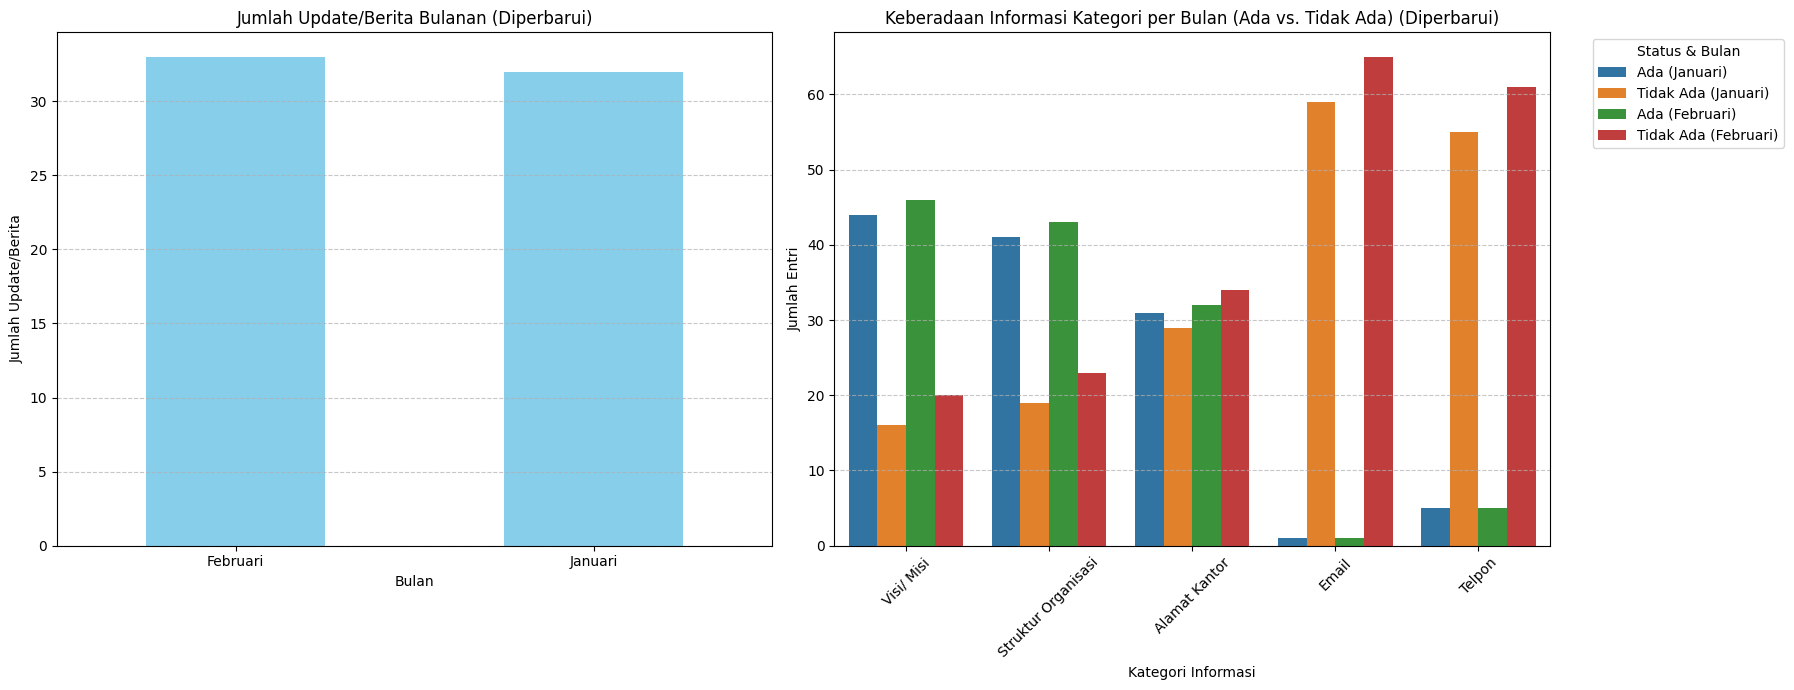

In [36]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Create a figure with two subplots
fig, axes = plt.subplots(1, 2, figsize=(18, 7))

# Plot 1: Monthly News Updates (Updated)
monthly_updates_updated.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Jumlah Update/Berita Bulanan (Diperbarui)')
axes[0].set_xlabel('Bulan')
axes[0].set_ylabel('Jumlah Update/Berita')
axes[0].tick_params(axis='x', rotation=0)
axes[0].grid(axis='y', linestyle='--', alpha=0.7)

# --- Modification for Plot 2: Monthly Category Presence (Ada vs. Tidak Ada) (Updated) ---
# Prepare data from summary_df_updated for plotting using stack for multi-index columns
df_summary_updated_melted = summary_df_updated.stack(level=[0, 1], future_stack=True).reset_index()
# Rename the columns for clarity after stacking and resetting index
df_summary_updated_melted.columns = ['Bulan', 'Kategori', 'Status', 'Jumlah']

# Create a combined 'Hue' column for Status and Bulan for better grouping on a single axis
df_summary_updated_melted['Status_Bulan'] = df_summary_updated_melted['Status'] + ' (' + df_summary_updated_melted['Bulan'] + ')'

# Reorder the combined 'Status_Bulan' for consistent plotting
status_bulan_order = ['Ada (Januari)', 'Tidak Ada (Januari)', 'Ada (Februari)', 'Tidak Ada (Februari)']
df_summary_updated_melted['Status_Bulan'] = pd.Categorical(df_summary_updated_melted['Status_Bulan'], categories=status_bulan_order, ordered=True)

# Plot 2: Monthly Category Presence (Ada vs. Tidak Ada) as a grouped bar chart
sns.barplot(x='Kategori', y='Jumlah', hue='Status_Bulan', data=df_summary_updated_melted, ax=axes[1], palette='tab10')

axes[1].set_title('Keberadaan Informasi Kategori per Bulan (Ada vs. Tidak Ada) (Diperbarui)')
axes[1].set_xlabel('Kategori Informasi')
axes[1].set_ylabel('Jumlah Entri')
axes[1].tick_params(axis='x', rotation=45)
axes[1].legend(title='Status & Bulan', bbox_to_anchor=(1.05, 1), loc='upper left')
axes[1].grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

In [37]:
import pandas as pd

# Recalculate monthly updates from df_updated
monthly_updates_updated = df_updated.groupby('Bulan')['Jumlah Update/Berita'].sum()
print("--- Monthly News Updates (Updated) ---")
print(monthly_updates_updated)

# Recalculate boolean indicator columns if they were affected by the update logic.
# However, the previous logic to create has_* columns was based on df_combined and not directly updated by scraped 'Ada'/'Tidak Ada'.
# Let's ensure the has_* columns in df_updated reflect the *final* 'Ada'/'Tidak Ada' values.

# Re-create boolean indicator columns based on the updated 'Visi/ Misi', 'Struktur Organisasi', etc.
info_columns = ['Visi/ Misi', 'Struktur Organisasi', 'Alamat Kantor', 'Email', 'Telpon']
for col in info_columns:
    df_updated[f'has_{col.lower().replace("/ ", "_").replace(" ", "_")}'] = \
        df_updated[col].astype(str).str.strip().str.lower().apply(lambda x: x == 'ada')

info_indicator_columns_updated = [
    'has_visi_misi',
    'has_struktur_organisasi',
    'has_alamat_kantor',
    'has_email',
    'has_telpon'
]

# Group by 'Bulan' and sum the boolean indicator columns for the updated data
monthly_category_presence_updated = df_updated.groupby('Bulan')[info_indicator_columns_updated].sum()

print("\n--- Monthly Category Presence (Updated) ---")
print(monthly_category_presence_updated)

--- Monthly News Updates (Updated) ---
Bulan
Februari    33
Januari     33
Name: Jumlah Update/Berita, dtype: int64

--- Monthly Category Presence (Updated) ---
          has_visi_misi  has_struktur_organisasi  has_alamat_kantor  \
Bulan                                                                 
Februari             46                       43                 32   
Januari              46                       43                 32   

          has_email  has_telpon  
Bulan                            
Februari          1           5  
Januari           1           5  


## Perbarui Ringkasan Keberadaan Informasi: 'Ada' vs. 'Tidak Ada' per Bulan (dari df_updated)

### Subtask:
Menghasilkan ulang tabel ringkasan yang menunjukkan jumlah entri 'Ada' dan 'Tidak Ada' untuk setiap kategori informasi per bulan, berdasarkan data yang telah diperbarui di `df_updated`.


In [ ]:
import pandas as pd

# 1. Calculate total entries per month from df_updated
total_entries_per_month_updated = df_updated.groupby('Bulan').size()

# 2. Initialize a dictionary to store the summary data
summary_data_updated = {}

# 3. Define the mapping for information category names
info_category_names = {
    'has_visi_misi': 'Visi/ Misi',
    'has_struktur_organisasi': 'Struktur Organisasi',
    'has_alamat_kantor': 'Alamat Kantor',
    'has_email': 'Email',
    'has_telpon': 'Telpon'
}

# 4. Iterate through each information category
for indicator_col, display_name in info_category_names.items():
    summary_data_updated[display_name] = {}
    # 5. For each category, iterate through the months
    for month in monthly_category_presence_updated.index:
        # 6. Retrieve the 'Ada' count from monthly_category_presence_updated
        ada_count = monthly_category_presence_updated.loc[month, indicator_col]

        # Use total_entries_per_month_updated for consistency
        total_month_entries = total_entries_per_month_updated.loc[month]

        # 7. Calculate the 'Tidak Ada' count
        tidak_ada_count = total_month_entries - ada_count

        # 8. Store these 'Ada' and 'Tidak Ada' counts
        summary_data_updated[display_name][month] = {'Ada': ada_count, 'Tidak Ada': tidak_ada_count}

# 9. Convert the summary_data_updated dictionary into a pandas DataFrame
summary_df_updated = pd.DataFrame.from_dict({
    (category, status): [data[month][status] for month in monthly_category_presence_updated.index]
    for category, data in summary_data_updated.items() for status in ['Ada', 'Tidak Ada']
}, orient='columns')

# 10. Set the index to be the months
summary_df_updated.index = monthly_category_presence_updated.index

# 11. Print a descriptive header
print("--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan (Diperbarui) ---")
# 12. Display the summary_df_updated DataFrame
display(summary_df_updated)

--- Ringkasan Keberadaan Informasi (Ada vs. Tidak Ada) per Bulan (Diperbarui) ---


Visi/ Misi           Struktur Organisasi           Alamat Kantor  \
                Ada Tidak Ada                 Ada Tidak Ada           Ada   
Bulan                                                                       
Februari         47        19                  45        21            34   
Januari          53         7                  55         5            55   

                   Email           Telpon            
         Tidak Ada   Ada Tidak Ada    Ada Tidak Ada  
Bulan                                                
Februari        32     1        65      5        61  
Januari          5    44        16     38        22